In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows',150000)
pd.set_option('display.max_columns',500)

In [2]:
df=pd.read_csv('2de5d338-216a-4cfb-b466-6fc16cecd233-Bonaventure---Healthcare-data.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [3]:
df.shape

(149999, 18)

In [4]:
df['Stay'].value_counts()

21-30                 42732
20-Nov                34375
31-40                 26455
51-60                 17656
0-10                   9589
41-50                  5509
71-80                  5229
More than 100 Days     3275
81-90                  2490
91-100                 1382
61-70                  1307
Name: Stay, dtype: int64

In [5]:
df['Age'].value_counts()

41-50     30500
31-40     30498
51-60     23575
71-80     18844
21-30     17386
61-70     16938
20-Nov     5705
81-90      4226
0-10       1691
91-100      636
Name: Age, dtype: int64

In [6]:
b_type_map = {"Urgent": 1,"Emergency": 2, "Trauma": 3}
df['Type of Admission_new'] = df['Type of Admission'].map(b_type_map)
df['Type of Admission_new'].value_counts()

3    76546
2    56389
1    17064
Name: Type of Admission_new, dtype: int64

In [7]:
b_type_map = {"Minor": 1,"Moderate": 2, "Extreme": 3}
df['Severity of Illness_new'] = df['Severity of Illness'].map(b_type_map)
df['Severity of Illness_new'].value_counts()

2    86056
1    32700
3    31243
Name: Severity of Illness_new, dtype: int64

In [8]:
b_type_map = {"0-10": 5,"20-Nov": 15, "21-30": 25, "31-40": 35, "41-50": 45, "51-60": 55, "61-70": 65,"71-80": 75,"81-90": 85,"91-100": 95}
df['Age_new'] = df['Age'].map(b_type_map)
df['Age_new'].value_counts()

45    30500
35    30498
55    23575
75    18844
25    17386
65    16938
15     5705
85     4226
5      1691
95      636
Name: Age_new, dtype: int64

In [9]:
b_type_map = {"0-10": 0,"20-Nov": 1, "21-30": 2, "31-40": 3, "41-50": 4, "51-60": 5, "61-70": 6,"71-80": 7,"81-90": 8,"91-100": 9,"More than 100 Days": 10}
df['Stay_new'] = df['Stay'].map(b_type_map)
df['Stay_new'].value_counts()

2     42732
1     34375
3     26455
5     17656
0      9589
4      5509
7      5229
10     3275
8      2490
9      1382
6      1307
Name: Stay_new, dtype: int64

Text(0.5, 1.0, 'Missing Values by column')

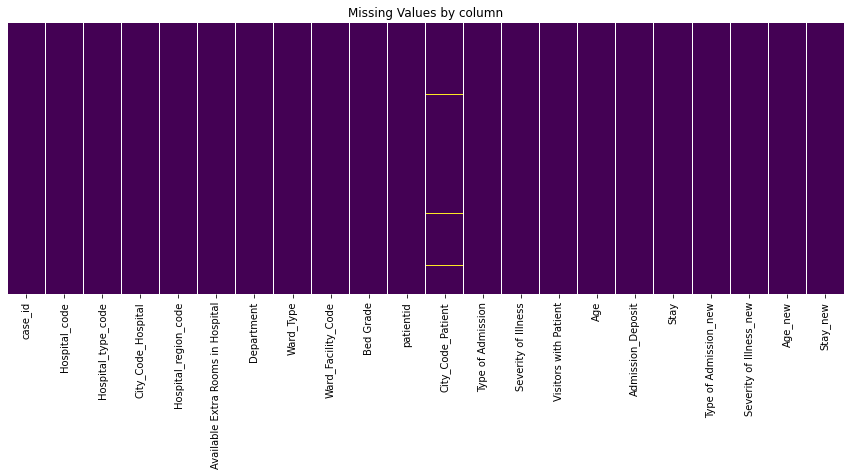

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="viridis" )
plt.title('Missing Values by column')

In [11]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Type of Admission_new',
       'Severity of Illness_new', 'Age_new', 'Stay_new'],
      dtype='object')

In [12]:
df.shape

(149999, 22)

In [13]:
df.dropna(axis=0,inplace=True)
df.shape

(148090, 22)

In [14]:
predictors_df=df[['Admission_Deposit','Visitors with Patient','Available Extra Rooms in Hospital','Age_new','Severity of Illness_new', 'Type of Admission_new','Bed Grade']]
target_val=df['Stay_new']        

Text(0.5, 1.0, 'Missing Values by column')

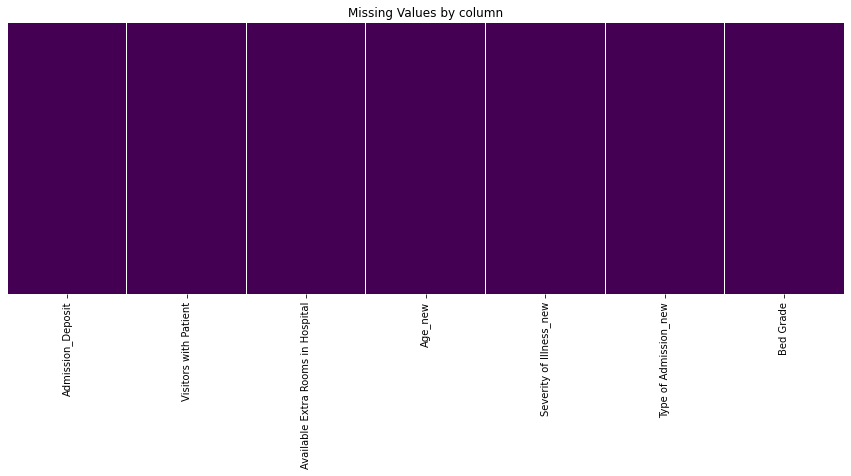

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(predictors_df.isnull(), cbar = False, yticklabels=False, cmap="viridis" )
plt.title('Missing Values by column')

In [16]:
predictors_df.isna().sum()

Admission_Deposit                    0
Visitors with Patient                0
Available Extra Rooms in Hospital    0
Age_new                              0
Severity of Illness_new              0
Type of Admission_new                0
Bed Grade                            0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
train_predictors_val, test_predictors_val, train_target_val, test_target_val = train_test_split(predictors_df,
                                                                                                target_val,
                                                                                                test_size=0.2,
                                                                                                )

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = train_predictors_val  
y = train_target_val

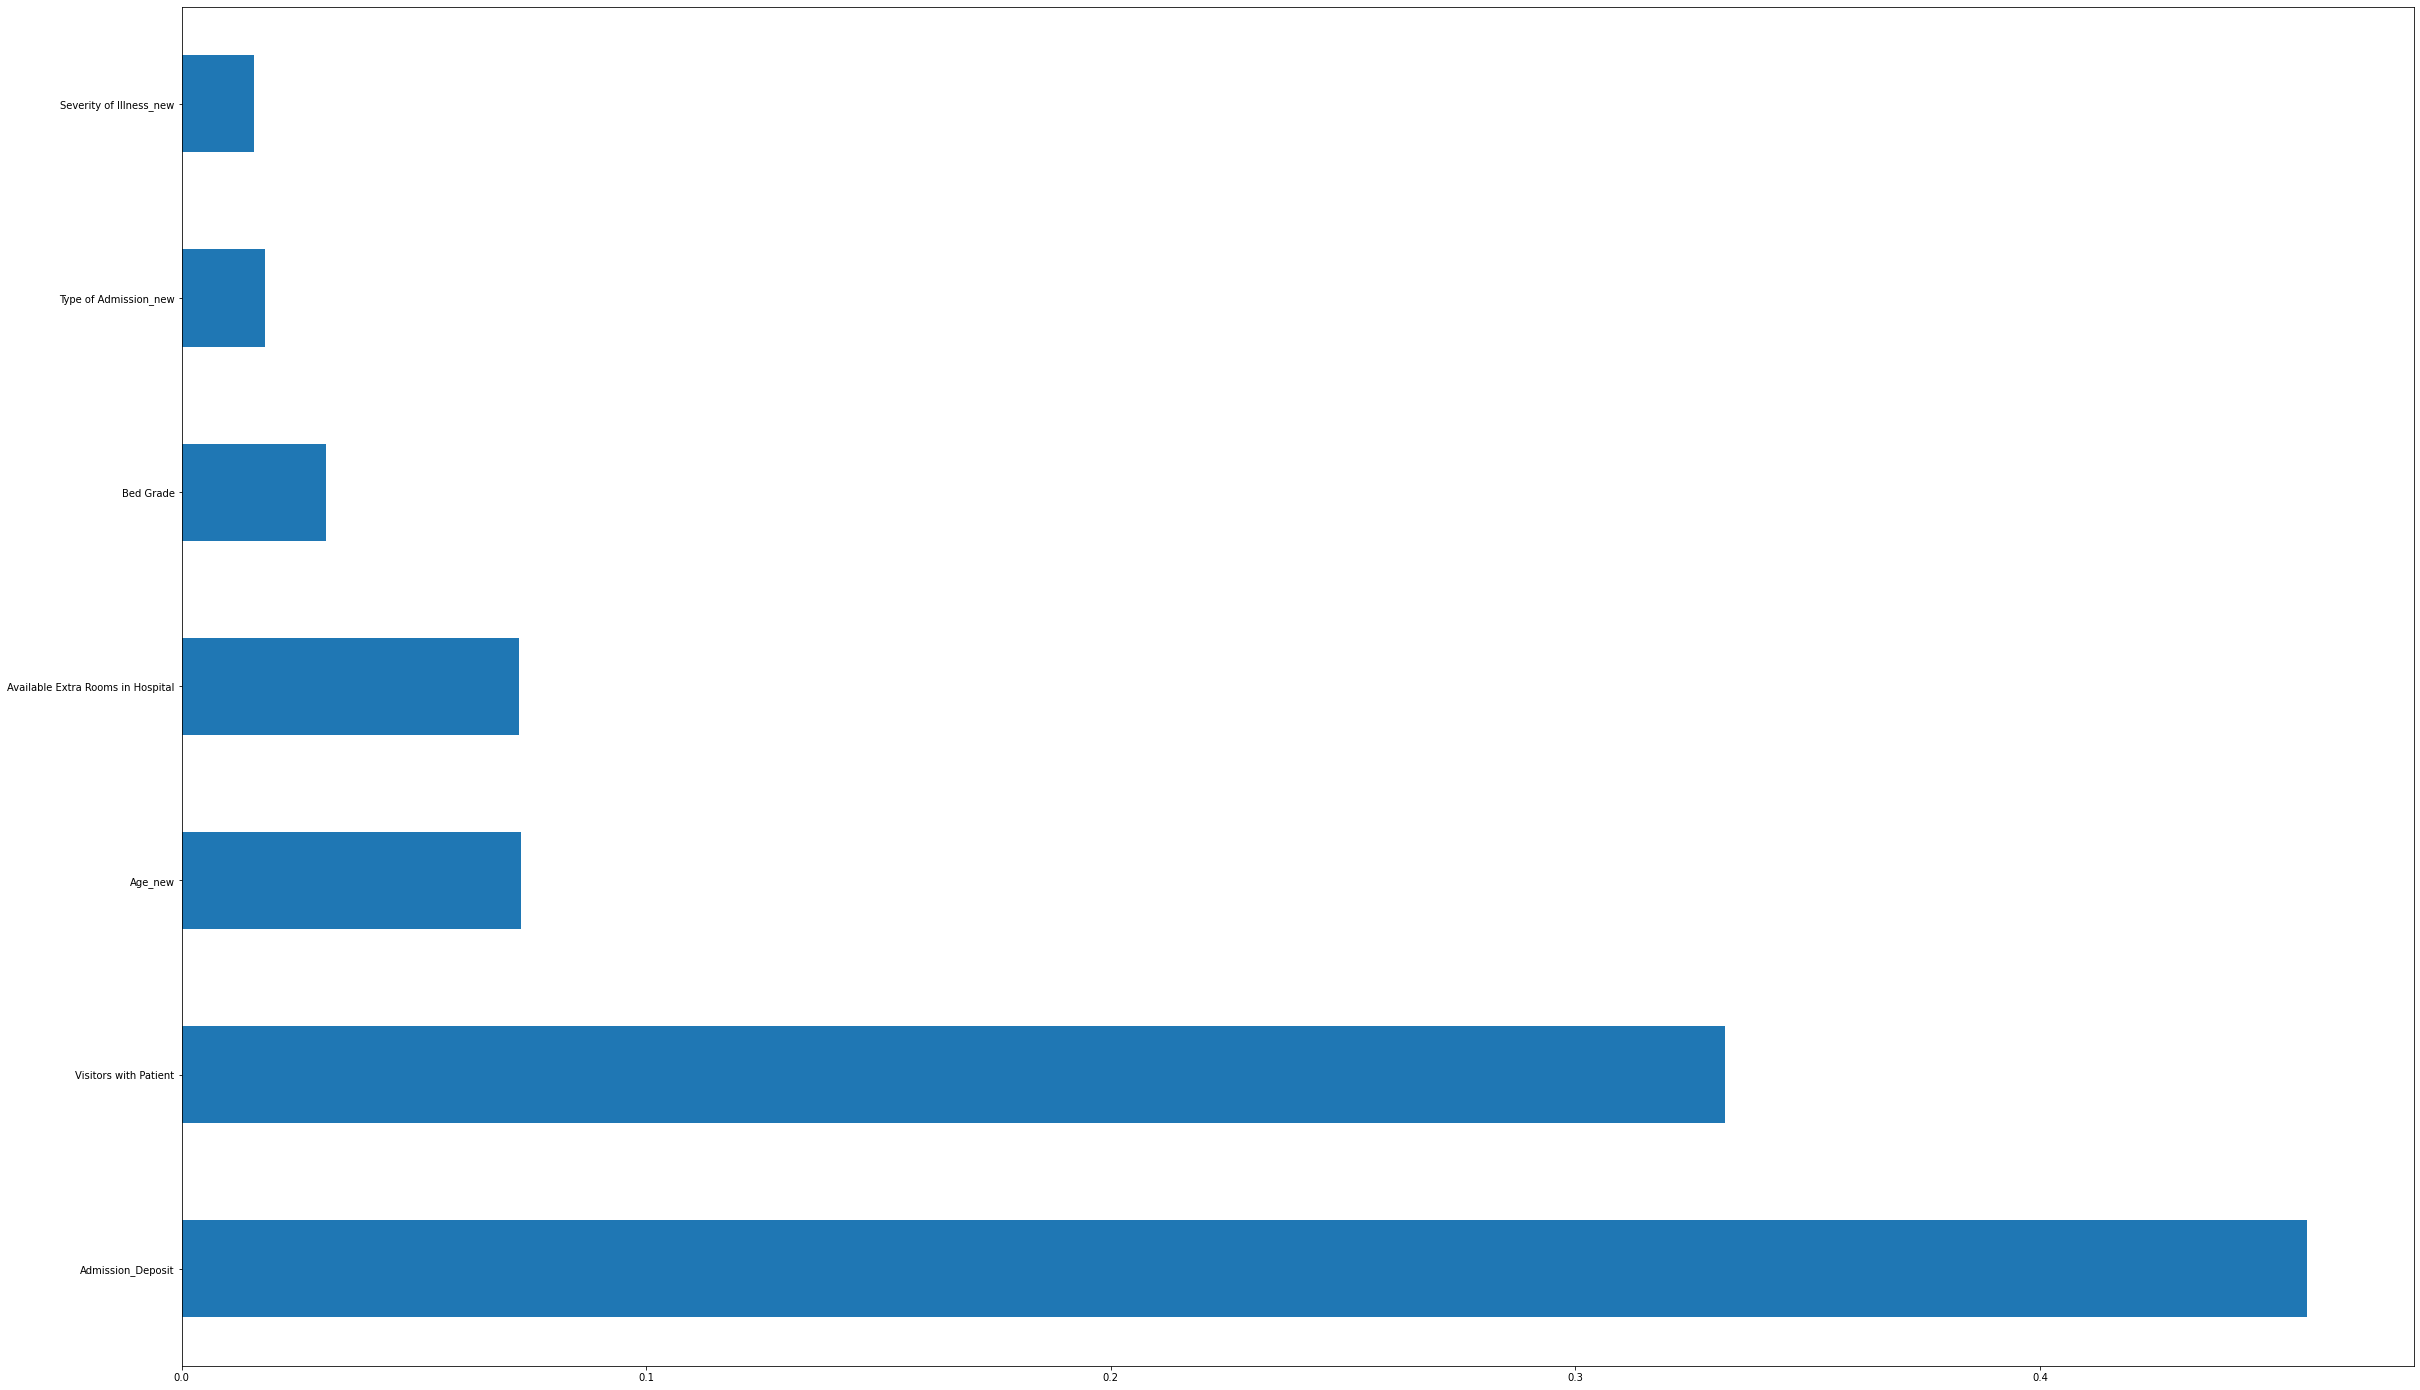

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

#plot graph of feature importances for better visualization
fig, ax = plt.subplots(figsize=(40,25))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(125).plot(kind='barh')
feat_importancesdf=pd.DataFrame(model.feature_importances_)
plt.show()

In [ ]:
import sklearn.model_selection as cv
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


rfc=RandomForestClassifier()
lre=LogisticRegression()
svc=SVC()

models = [rfc,lre,svc]

for mod in models:
    mod.fit(train_predictors_val, train_target_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [ ]:
final_p_scores = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    p_score= precision_score(test_target_val, y_pred)*100
    final_p_scores.append(p_score)

In [ ]:
final_r_scores = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    r_score= recall_score(test_target_val, y_pred)
    final_r_scores.append(r_score)

In [ ]:
final_f1_scores = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    f1_score= f1_score(test_target_val, y_pred)
    final_f1_scores.append(f1_score)